In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [11]:
df_FitBit = pd.read_parquet('fitbitSleepStages.parquet.gzip', engine='pyarrow')

In [39]:
df_FitBit.dtypes

timestamp       datetime64[ns, UTC]
stage                       float64
endTimestamp    datetime64[ns, UTC]
x               datetime64[ns, UTC]
y                           float64
dtype: object

In [108]:
df_FitBit.columns

Index(['timestamp', 'stage', 'endTimestamp', 'x', 'y', 'day', 'month', 'year',
       'hour', 'time', 'date'],
      dtype='object')

In [114]:
df_FitBit_Jul_17_20 = df_FitBit.loc["2020-07-11"]

In [ ]:
df_FitBit

In [115]:
df_FitBit_Jul_17_20

,timestamp,stage,endTimestamp,x,y,day,month,year,hour,time,date
index,,,,,,,,,,,
2020-07-11 09:13:00+00:00,2020-07-11 09:13:00+00:00,1.0,2020-07-11 09:15:00+00:00,2020-07-11,1.0,11,7,2020,9,09:13:00,2020-07-11
2020-07-11 09:15:00+00:00,2020-07-11 09:15:00+00:00,0.0,2020-07-11 09:35:30+00:00,2020-07-11,0.0,11,7,2020,9,09:15:00,2020-07-11
2020-07-11 09:35:30+00:00,2020-07-11 09:35:30+00:00,1.0,2020-07-11 09:54:30+00:00,2020-07-11,1.0,11,7,2020,9,09:35:30,2020-07-11
2020-07-11 09:54:30+00:00,2020-07-11 09:54:30+00:00,2.0,2020-07-11 10:07:00+00:00,2020-07-11,2.0,11,7,2020,9,09:54:30,2020-07-11
2020-07-11 10:07:00+00:00,2020-07-11 10:07:00+00:00,1.0,2020-07-11 10:31:30+00:00,2020-07-11,1.0,11,7,2020,10,10:07:00,2020-07-11
2020-07-11 10:31:30+00:00,2020-07-11 10:31:30+00:00,3.0,2020-07-11 10:43:00+00:00,2020-07-11,3.0,11,7,2020,10,10:31:30,2020-07-11
2020-07-11 10:43:00+00:00,2020-07-11 10:43:00+00:00,1.0,2020-07-11 10:56:00+00:00,2020-07-11,1.0,11,7,2020,10,10:43:00,2020-07-11
2020-07-11 10:56:00+00:00,2020-07-11 10:56:00+00:00,0.0,2020-07-11 11:01:00+00:00,2020-07-11,0.0,11,7,2020,10,10:56:00,2020-07-11
2020-07-11 11:01:00+00:00,2020-07-11 11:01:00+00:00,1.0,2020-07-11 11:09:30+00:00,2020-07-11,1.0,11,7,2020,11,11:01:00,2020-07-11


/Users/aritro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aritro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


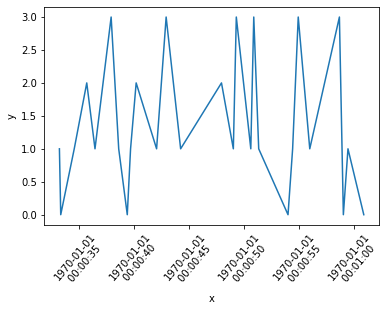

In [124]:
df_FitBit_Jul_17_20['x'] = df_FitBit_Jul_17_20['time']
df_FitBit_Jul_17_20['y'] = df_FitBit_Jul_17_20['stage']

df_FitBit_Jul_17_20.timestamp = pd.to_datetime(df_FitBit_Jul_17_20.timestamp, unit='ns')

df_FitBit['date']= df_FitBit['timestamp'].dt.date
df_FitBit['time']= df_FitBit['timestamp'].dt.time
df_FitBit['hour']= df_FitBit['timestamp'].dt.hour
df_FitBit['day'] = df_FitBit['timestamp'].dt.day
df_FitBit['month'] = df_FitBit['timestamp'].dt.month
df_FitBit['year'] = df_FitBit['timestamp'].dt.year

ax = sns.lineplot('x', 'y', data=df_FitBit_Jul_17_20)
xticks = ax.get_xticks()
ax.set_xticklabels([pd.to_datetime(tm, unit='ms').strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks],
 rotation=50)
#ax.set_xlim(df_FitBit_Jul_17_20['time'].min(), df_FitBit_Jul_17_20['time'].max())
#myFmt = mdates.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(myFmt)
#for item in ax.get_xticklabels():
    #item.set_rotation(45)
plt.show()

In [97]:
df_FitBit.head

<bound method NDFrame.head of                                           timestamp  stage  \
index                                                        
2020-07-11 09:13:00+00:00 2020-07-11 09:13:00+00:00    1.0   
2020-07-11 09:15:00+00:00 2020-07-11 09:15:00+00:00    0.0   
2020-07-11 09:35:30+00:00 2020-07-11 09:35:30+00:00    1.0   
2020-07-11 09:54:30+00:00 2020-07-11 09:54:30+00:00    2.0   
2020-07-11 10:07:00+00:00 2020-07-11 10:07:00+00:00    1.0   
...                                             ...    ...   
2020-07-12 17:53:30+00:00 2020-07-12 17:53:30+00:00    1.0   
2020-07-12 18:00:30+00:00 2020-07-12 18:00:30+00:00    0.0   
2020-07-12 18:05:00+00:00 2020-07-12 18:05:00+00:00    1.0   
2020-07-12 18:52:30+00:00 2020-07-12 18:52:30+00:00    3.0   
2020-07-12 18:57:00+00:00 2020-07-12 18:57:00+00:00    1.0   

                                       endTimestamp           x    y  day  \
index                                                                       
2020-07-1

In [104]:
type(df_FitBit['time'].max())

datetime.time

In [113]:
df_FitBit.loc["2020-07-11"]

,timestamp,stage,endTimestamp,x,y,day,month,year,hour,time,date
index,,,,,,,,,,,
2020-07-11 09:13:00+00:00,2020-07-11 09:13:00+00:00,1.0,2020-07-11 09:15:00+00:00,2020-07-11,1.0,11,7,2020,9,09:13:00,2020-07-11
2020-07-11 09:15:00+00:00,2020-07-11 09:15:00+00:00,0.0,2020-07-11 09:35:30+00:00,2020-07-11,0.0,11,7,2020,9,09:15:00,2020-07-11
2020-07-11 09:35:30+00:00,2020-07-11 09:35:30+00:00,1.0,2020-07-11 09:54:30+00:00,2020-07-11,1.0,11,7,2020,9,09:35:30,2020-07-11
2020-07-11 09:54:30+00:00,2020-07-11 09:54:30+00:00,2.0,2020-07-11 10:07:00+00:00,2020-07-11,2.0,11,7,2020,9,09:54:30,2020-07-11
2020-07-11 10:07:00+00:00,2020-07-11 10:07:00+00:00,1.0,2020-07-11 10:31:30+00:00,2020-07-11,1.0,11,7,2020,10,10:07:00,2020-07-11
2020-07-11 10:31:30+00:00,2020-07-11 10:31:30+00:00,3.0,2020-07-11 10:43:00+00:00,2020-07-11,3.0,11,7,2020,10,10:31:30,2020-07-11
2020-07-11 10:43:00+00:00,2020-07-11 10:43:00+00:00,1.0,2020-07-11 10:56:00+00:00,2020-07-11,1.0,11,7,2020,10,10:43:00,2020-07-11
2020-07-11 10:56:00+00:00,2020-07-11 10:56:00+00:00,0.0,2020-07-11 11:01:00+00:00,2020-07-11,0.0,11,7,2020,10,10:56:00,2020-07-11
2020-07-11 11:01:00+00:00,2020-07-11 11:01:00+00:00,1.0,2020-07-11 11:09:30+00:00,2020-07-11,1.0,11,7,2020,11,11:01:00,2020-07-11
